In [1]:
from collections import Counter
import os
import pickle
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import sys 

In [3]:
! chmod +x ./algorithms/evomine
! chmod +x ./algorithms/germ

In [12]:
import importlib

import file_converters as f
import running_algorithms as r
import general_mapping as g
import analysis as a
import drawing as d 
import canonical as c

In [3]:
from importlib import reload
reload(f)

reload(r)

reload(g)

reload(a)

reload(d)

<module 'drawing' from '/data-restricted/home/alessia_galdeman/geranio/geranio/drawing.py'>

<img src = './imgs/pipeline.png' width = 90%>

# CONVERT from raw to input

In [4]:
f.from_txtfile_to_gerinput(input_path = './raw-datasets/dblp0305.txt', 
                           output_path = './input-files/[ger-ready]-dblp0305.txt', 
                           separator = ' ')

removed ./input-files/[ger-ready]-dblp0305.txt
Edge list converted, ger format file saved in  ./input-files/[ger-ready]-dblp0305.txt


# RUN algorithm

## GERM 

### dblp0305

In [5]:
s = 5000
m = 3

In [6]:
r.run_algorithm(algo = 'germ', 
              sup = s, 
              maxedge = m, 
              filename = './input-files/[ger-ready]-dblp0305.txt', 
              outputfile = f'dblp0305.{s}.{m}.txt',    
              verbose = False)

### dblp0507

In [7]:
s = 5000
m = 3
r.run_algorithm(algo = 'germ', 
              sup = s, 
              maxedge = m, 
              filename = './input-files/dblp0507', 
              outputfile = f'[germ]dblp0507.{s}.{m}.txt',    
              verbose = True, superverbose=False)

Running command:
/data-restricted/home/alessia_galdeman/geranio/geranio/algorithms/germ 5000 ./input-files/dblp0507 3 > /dev/null
Output moved from ./input-files/dblp0507.out.5000.3.REL to ./output-files/[germ]dblp0507.5000.3.txt


## EvoMine

### dblp0305

In [60]:
algorithm = 'EvoMine'
r.run_algorithm(algo = algorithm, 
              sup = s, 
              maxedge = m, 
              filename = './input-files/[ger-ready]-dblp0305.txt', 
              outputfile = f'[{algorithm}]dblp0305.{s}.{m}.txt',  
              directed = False,
              projection='full',
              #edge_color=True,
              #node_color=True,
              verbose = True,superverbose = False)

Running command:
/data-restricted/home/alessia_galdeman/geranio/geranio/algorithms/evomine -s 5000 -e 3 -T full -t -u -f ./input-files/[ger-ready]-dblp0305.txt > /dev/null
Output moved from ./input-files/[ger-ready]-dblp0305.txt.out.evomine.FULL.5000.3 to [EvoMine]dblp0305.5000.3.txt


### dblp0507

In [61]:
s = 5000
m = 3

In [62]:
algorithm = 'EvoMine'
r.run_algorithm(algo = algorithm, 
              sup = s, 
              maxedge = m, 
              filename = './input-files/dblp0507', 
              outputfile = f'./output-files/[{algorithm}]dblp0507.{s}.{m}.txt',  
              directed = False,
              projection='full',
              verbose = True,superverbose = False)

Running command:
/data-restricted/home/alessia_galdeman/geranio/geranio/algorithms/evomine -s 5000 -e 3 -T full -t -u -f ./input-files/dblp0507 > /dev/null
Output moved from ./input-files/dblp0507.out.evomine.FULL.5000.3 to ./output-files/[EvoMine]dblp0507.5000.3.txt


# CONVERT from output to ger list

## GERM

### dblp0305

In [8]:
g_info_list, g_patterns, g_support_patterns, g_mapping = f.from_ger_output(f'./output-files/dblp0305.{s}.{m}.txt')

In [9]:
g_pattern_list, g_support = f.obtain_pattern_list(g_patterns, g_support_patterns, algorithm = 'germ')

### dblp0507

In [10]:
g_info_list_b, g_patterns_b, g_support_patterns_b, g_mapping_b = f.from_ger_output(f'./output-files/[germ]dblp0507.{s}.{m}.txt')

In [11]:
g_pattern_list_b, g_support_b = f.obtain_pattern_list(g_patterns_b, g_support_patterns_b, algorithm = 'germ')

## EvoMine

### dblp0305

In [66]:
e_info_list, e_patterns, e_support_patterns, e_mapping = f.from_ger_output(f'[EvoMine]dblp0305.5000.3.txt')

In [67]:
e_pattern_list, e_support = f.obtain_pattern_list(e_patterns, e_support_patterns, algorithm = 'evomine')

### dblp0507


In [68]:
e_info_list_b, e_patterns_b, e_support_patterns_b, e_mapping_b = f.from_ger_output(f'./output-files/[EvoMine]dblp0507.5000.3.txt')

In [69]:
e_pattern_list_b, e_support_b = f.obtain_pattern_list(e_patterns_b, e_support_patterns_b, algorithm = 'evomine')

# MAPPING ger ids into a common one

## GERM

### dblp0305

In [66]:
reload(g)
g_new_pattern_list, g_new_support = g.mapping_pattern_ids('Germ',g_pattern_list, g_support, 
                                                      general_mapping = dict(), 
                                                      mapped_patterns_path = f'./processed-outputs/[mapped]-dblp0305.{s}.{m}', 
                                                      directed = False)

### dblp0507

In [67]:

g_new_pattern_list_b, g_new_support_b = g.mapping_pattern_ids('germ',g_pattern_list_b, g_support_b, 
                                                      general_mapping =  pickle.load(open('germ_general_mapping.p','rb')), 
                                                      mapped_patterns_path = f'./processed-outputs/[mapped]-dblp0507.{s}.{m}', 
                                                      directed = False)

### example of the effect of the mapping

In [ ]:
g_pattern_list_b[14] # pattern 14 has this edges...

((0, 1, 0), (1, 2, 0), (2, 3, 2))

In [ ]:
g_pattern_list[13] # same as pattern 13 in dblp0305

((0, 1, 0), (1, 2, 0), (2, 3, 2))

In [ ]:
g_new_pattern_list_b[13] # now the pattern 

{'edges': [(0, 1, 0), (1, 2, 0), (2, 3, 2)], 'old-ids': 14}

In [ ]:
g_new_pattern_list[13]

{'old-ids': 13, 'edges': ((0, 1, 0), (1, 2, 0), (2, 3, 2))}

# canonical code
faster computation of a general mapping thanks to the bliss algorithm in the igraph implementation

In [19]:
#pickle.dump({}, open('general_mapping_canonical.p','wb') )

In [75]:
reload(c)
g_new_pattern_list_can, g_new_support_can = c.mapping_pattern_ids(g_pattern_list, g_support, 
                                                          mapped_patterns_path = f'./processed-outputs/[canonical]-dblp0305.{s}.{m}'
                                                         )

In [78]:
#reload(g)
g_new_pattern_list_b_can, g_new_support_b_can = c.mapping_pattern_ids(g_pattern_list_b, g_support_b, 
                                                          mapped_patterns_path = f'./processed-outputs/[canonical]-dblp0507.{s}.{m}'
                                                         )

## EvoMine

### dblp0305

In [ ]:
#reload(c)
e_new_pattern_list, e_new_support = g.mapping_pattern_ids('evomine',e_pattern_list, e_support, 
                                                      general_mapping = dict(), 
                                                      mapped_patterns_path = f'./processed-outputs/[mapped-Evomine]-dblp0305.{s}.{m}', 
                                                      directed = False)

### dblp0507

In [72]:
#reload(g)
e_new_pattern_list_b, e_new_support_b = g.mapping_pattern_ids('evomine',e_pattern_list_b, e_support_b, 
                                                      general_mapping = pickle.load(open('evomine_general_mapping.p','rb')),
    
                                                      mapped_patterns_path = f'./processed-outputs/[mapped-Evomine]-dblp0305.{s}.{m}', 
                                                      directed = False)

# ANALYSIS 


## GERM 

In [79]:
g_general_mapping_can = pickle.load(open('general_mapping_canonical.p','rb') )
rules_canonical = list(g_general_mapping_can.keys())
rules_short = [g_general_mapping_can[c][0] for c in rules_canonical]
g_profile_b_can = a.get_profiles(g_new_support_b_can, rules_short, './processed-outputs/',)
g_profile_can = a.get_profiles(g_new_support_can, rules_short, './processed-outputs/',)

In [68]:
g_general_mapping = pickle.load(open('germ_general_mapping.p','rb') )
g_profile_b = a.get_profiles(g_new_support_b, list(g_general_mapping.keys()), './processed-outputs/',)
g_profile = a.get_profiles(g_new_support, list(g_general_mapping.keys()), './processed-outputs/',)

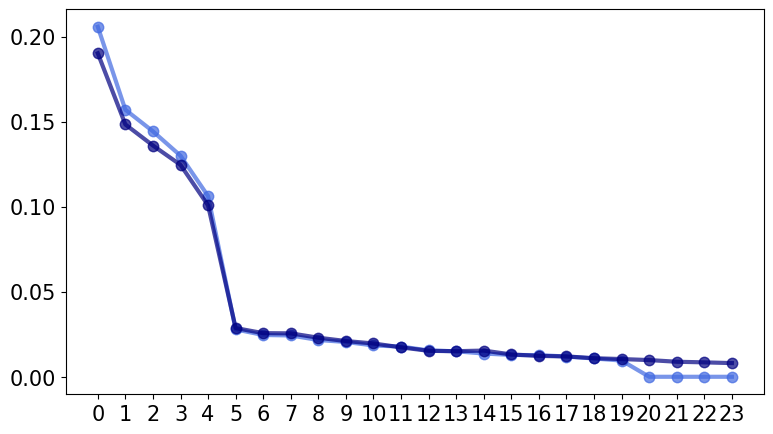

In [80]:
plt.figure(figsize = (9,5))
plt.plot(g_profile_can, '.-', ms = 15,lw =3,color='royalblue', alpha = 0.7)
plt.plot(g_profile_b_can, '.-', ms = 15,lw =3,color='navy', alpha = 0.7)
plt.xticks(range(24), size =15)
plt.yticks(size =15)
plt.show()

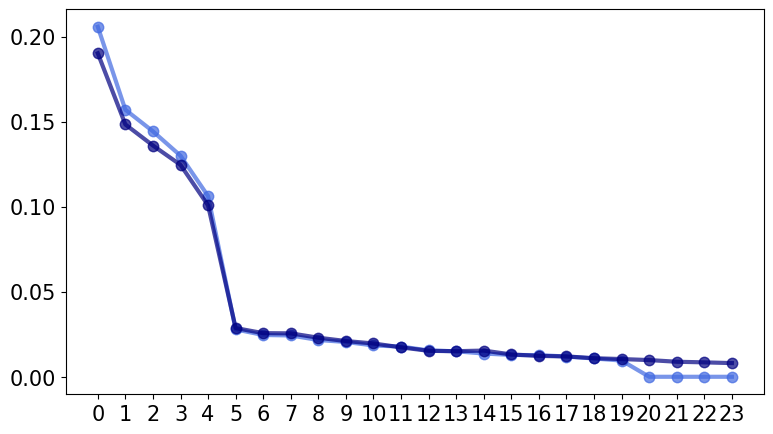

In [73]:
plt.figure(figsize = (9,5))
plt.plot(g_profile, '.-', ms = 15,lw =3,color='royalblue', alpha = 0.7)
plt.plot(g_profile_b, '.-', ms = 15,lw =3,color='navy', alpha = 0.7)
plt.xticks(range(24), size =15)
plt.yticks(size =15)
plt.show()

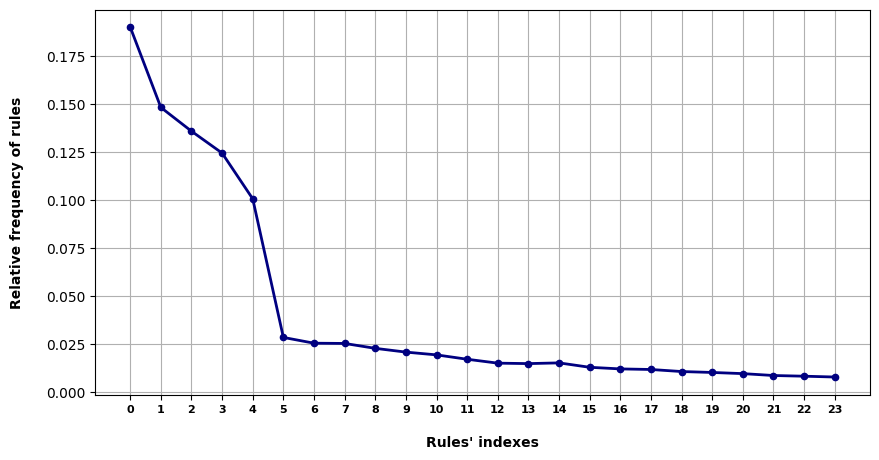

In [81]:
a.plot_profile(g_profile_b_can, rules_short)

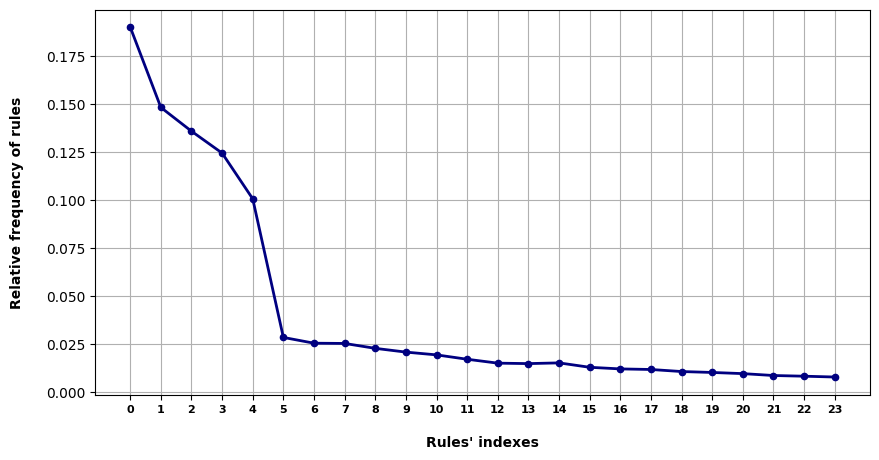

In [69]:
a.plot_profile(g_profile_b, list(g_general_mapping.keys()))

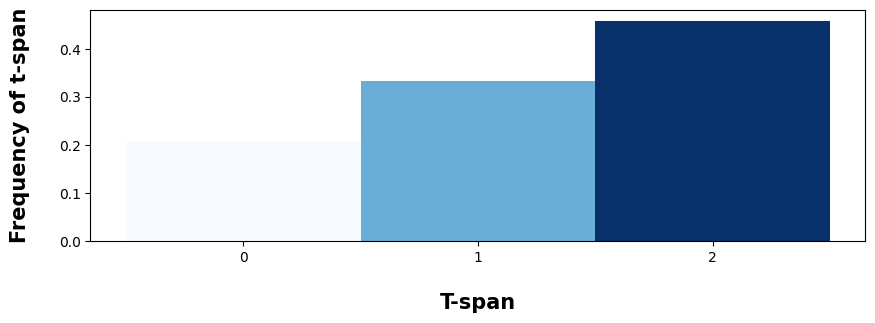

In [82]:
spans_b = a.t_span_plot(g_new_pattern_list_b_can,
               cmap = 'Blues',
                fs = (10,3),
                 cbar_ticks_size = 25,
                 plot_params = {'ms' : 9, 'lw' : 2, 'style':'.-'},
                 ticks_params = {'fontsize_x':10, 'rotation_x':0,'fontweight_x':'bold',
                                'fontsize_y':10, 'rotation_y':0,'fontweight_y':'bold'},
                 label_params = {'xlabel': "\nT-span", 'fontsize_x' :15, 'fontweight_x':'bold',
                                'ylabel': "Frequency of t-span\n", 'fontsize_y' :15, 'fontweight_y':'bold'})
    

## Evomine

In [73]:
general_mapping = pickle.load(open('evomine_general_mapping.p','rb'))
e_profile = a.get_profiles(e_new_support, list(general_mapping.keys()), './processed-outputs/',)

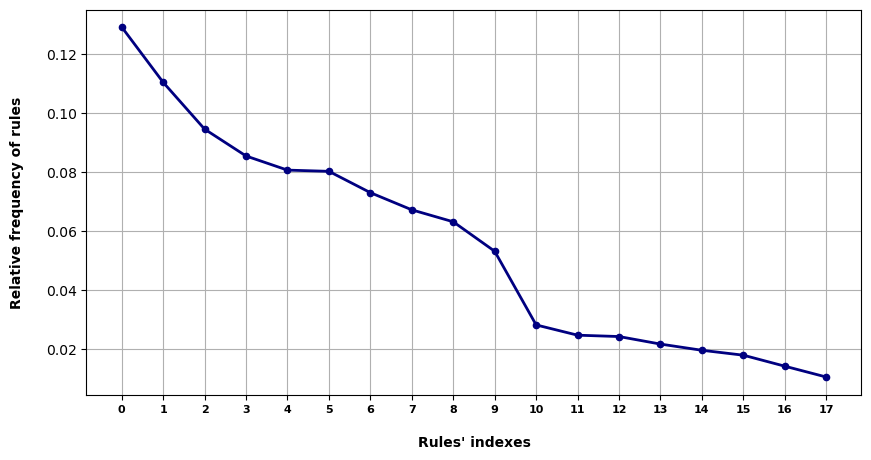

In [74]:
a.plot_profile(e_profile, list(general_mapping.keys()))

In [75]:
e_profile_b = a.get_profiles(e_new_support_b, list(general_mapping.keys()), './processed-outputs/',)

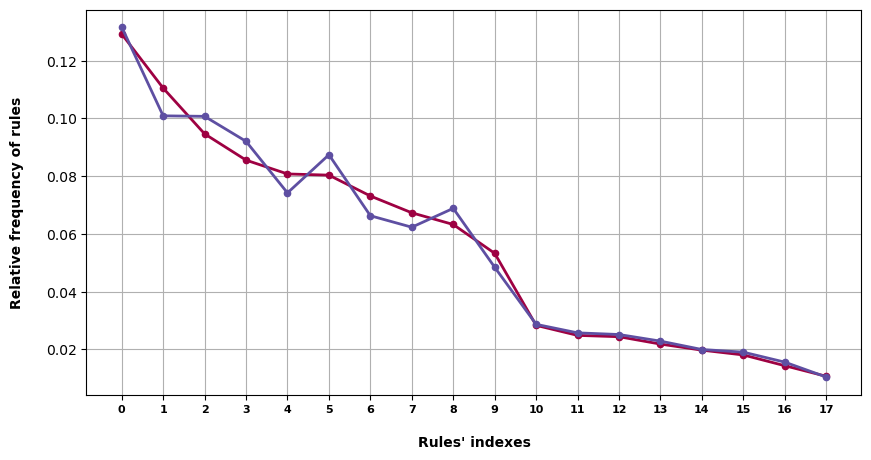

In [ ]:
a.plot_profile([e_profile,e_profile_b], list(general_mapping.keys()), single_profile=False)

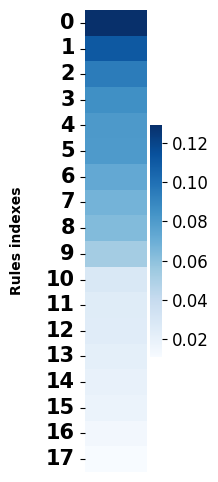

In [ ]:
a.plot_heatmap(e_profile, 
               list(general_mapping.keys()),
               fs=(1,6),
               cbar_ticks_size = 12,
               ticks_params = {'fontsize_x':25, 'rotation_x':0,'fontweight_x':'bold',
                                'fontsize_y':15, 'rotation_y':0,'fontweight_y':'bold'},
              label_params = {'xlabel': "", 'fontsize_x' :10, 'fontweight_x':'bold',
                                'ylabel': "Rules indexes\n", 'fontsize_y' :10, 'fontweight_y':'bold'})


# drawing 

## GERM

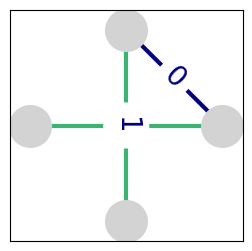

In [84]:
d.draw_pattern_ger('germ', [p['edges'] for p in g_new_pattern_list_can.values()][10],
                             w = 3,h = 3)

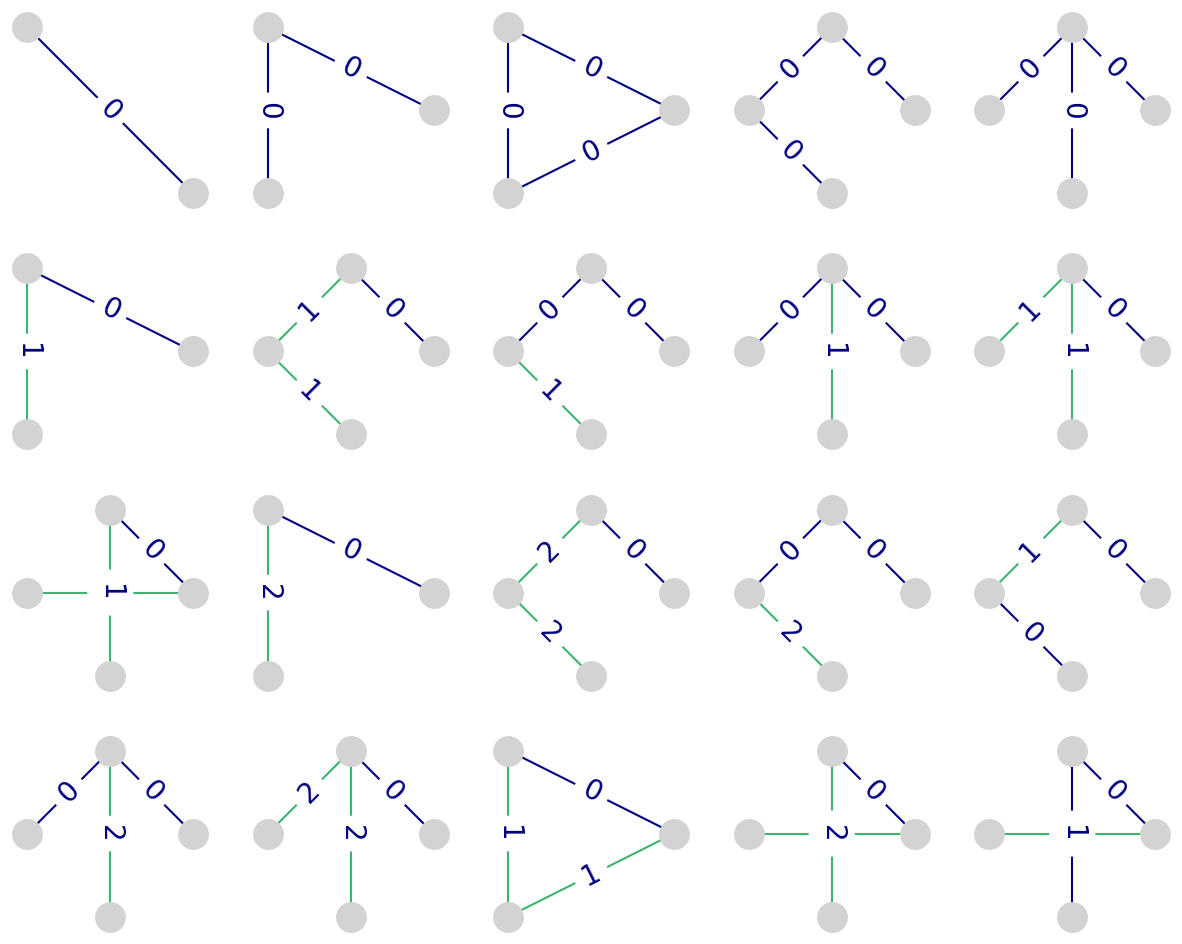

In [85]:
d.draw_several_patterns('germ', g_new_pattern_list_can, 
                          columns = 5, w_box = 3)


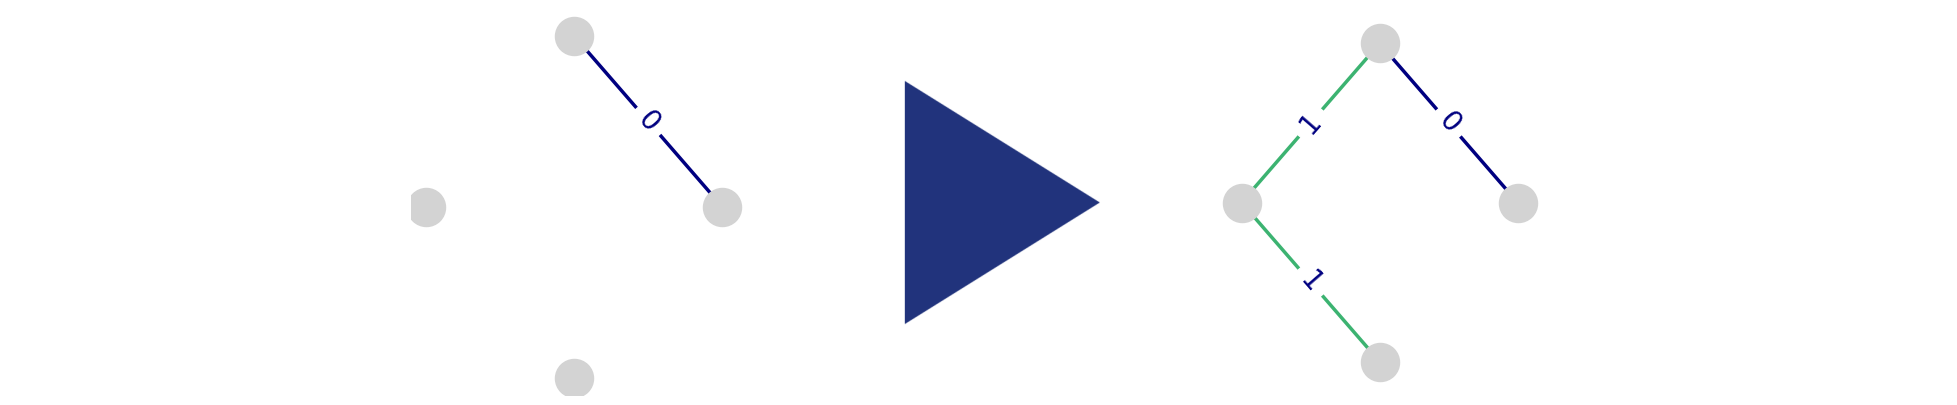

In [87]:
reload(d)
d.draw_rule('germ', [p['edges'] for p in g_new_pattern_list_can.values()][12], w_box = 5)

## EvoMine

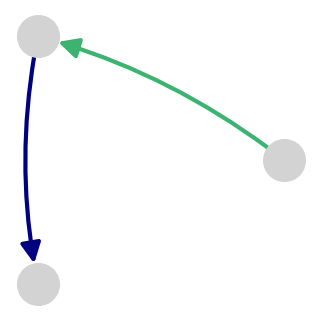

In [ ]:
d.draw_pattern_ger('evomine', [p['edges'] for p in e_new_pattern_list.values()][10],
                             w = 3,h = 3)

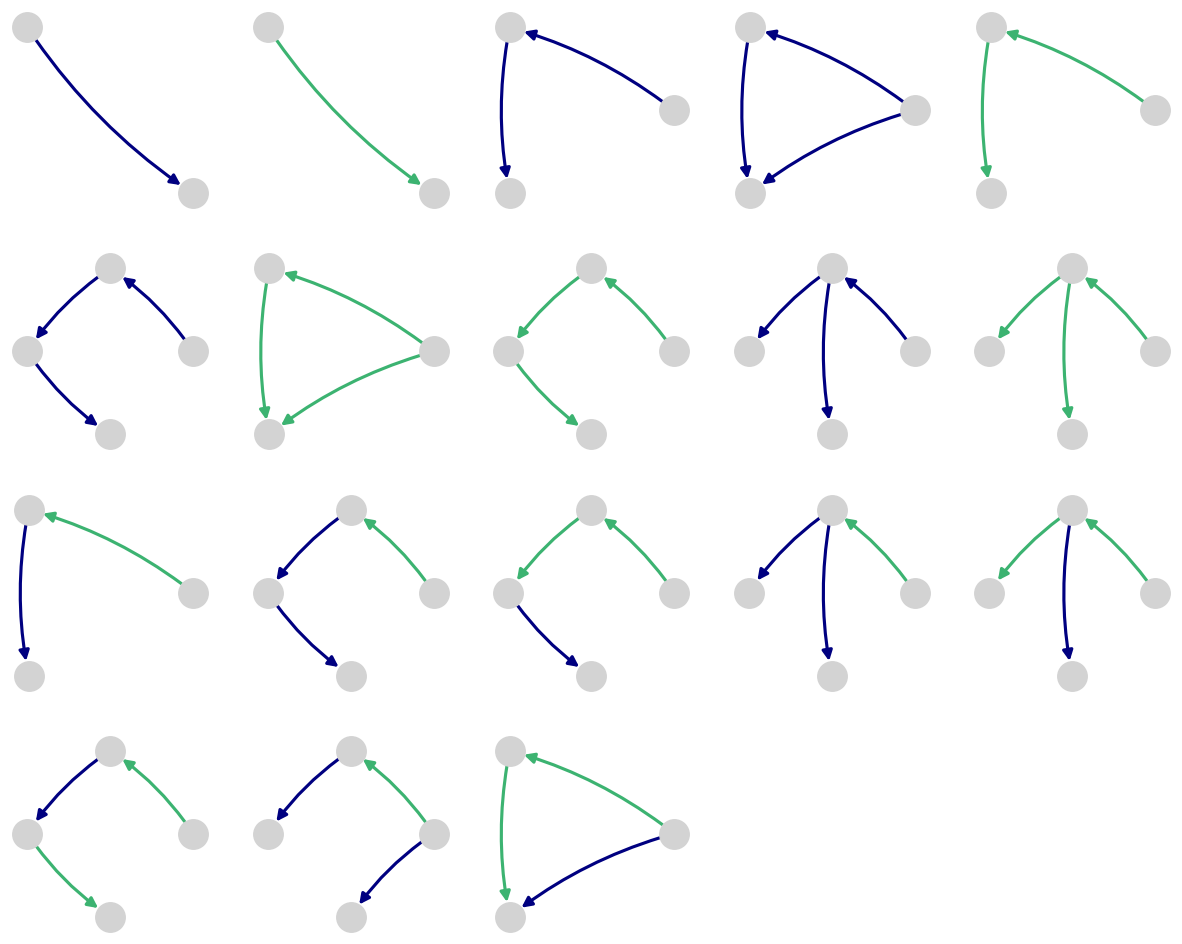

In [ ]:
d.draw_several_patterns('evomine', e_new_pattern_list, 
                          columns = 5, w_box = 3)

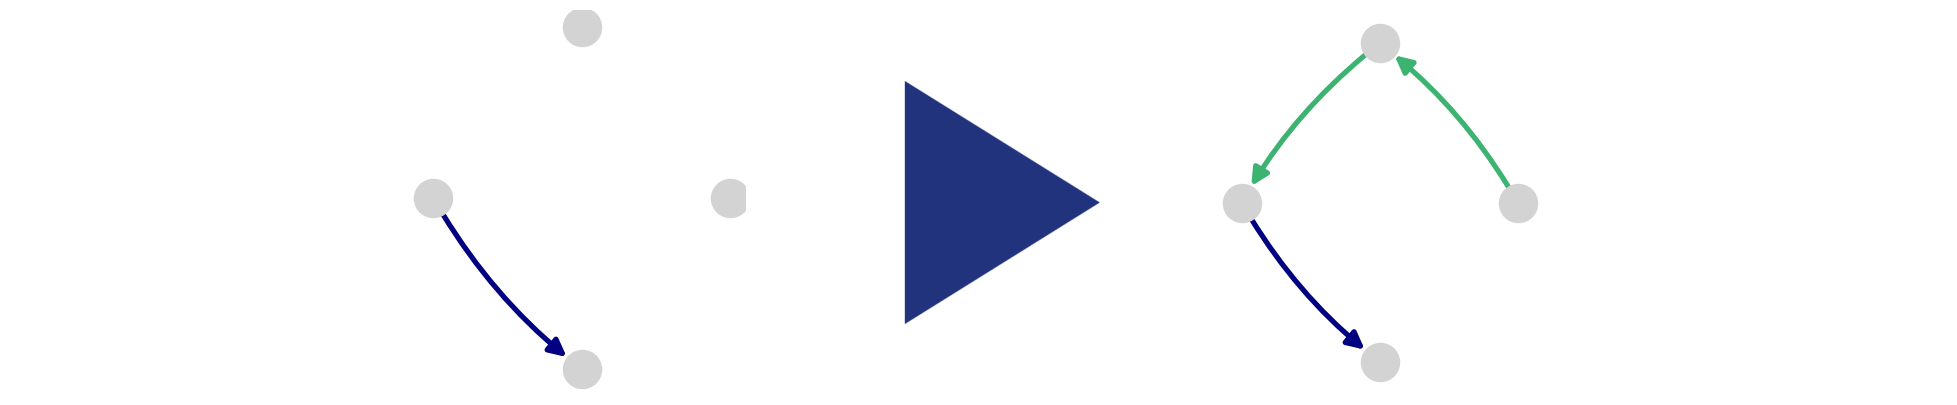

In [ ]:
d.draw_rule('evomine', [p['edges'] for p in e_new_pattern_list.values()][12], w_box = 5)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=610e0907-6802-4939-b7da-d8a5a67aba28' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>